<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Trabajo Práctico 0  
**Carola Piazze Vicini**


## Introducción
El objetivo de este trabajo fue diseñar una función que genere señales senoidales, de manera que podamos usarla como base para distintos experimentos y simulaciones. La idea es que, al cambiar parámetros como la amplitud, el valor medio, la frecuencia o la fase, podamos observar cómo se modifica la señal. En este experimento se varió principalmente la frecuencia de muestreo. 
### Teorema de Nyquist–Shannon
Al trabajar con señales digitales, no alcanza con “dibujar” la senoidal: hace falta decidir cada cuánto la vamos a muestrear, es decir, qué **frecuencia de muestreo** usar (fs).
El teorema de Nyquist–Shannon dice que la frecuencia de muestreo tiene que ser por lo menos el doble de la frecuencia máxima de la señal:

$$
f_s \geq 2 f_{max}
$$

donde $f_{max}$ es la frecuencia más alta presente en la señal.

Si se cumple esa condición, la señal muestreada conserva la información suficiente como para poder reconstruirla sin problemas. Si no se cumple, pasa lo que se llama aliasing: en lugar de ver la frecuencia real, el sistema interpreta otra más baja que no corresponde. Es decir que la señal “se disfraza” y ya no se parece a la original.
En este trabajo esto es clave porque, al generar senoidales y elegir distintas frecuencias, necesitamos asegurarnos de que la frecuencia de muestreo sea adecuada. De lo contrario, los gráficos que obtengamos no representarían bien la señal real y podríamos sacar conclusiones equivocadas.



## Desarollo
Usando la función senoidal que había armado en clase como punto de partida, y una vez lograda la senoidal de prueba, comencé a probar las distintas frecuencias que se pedían en el TP. Tuve que aumentar considerablemente la cantidad de muestras respecto al número que había usado en clase, porque los gráficos no se veían suaves. Aún no descubrí qué fue lo que toqué distinto, porque usé como base un código que en el aula graficaba bien.

### Generación de una señal senoidal

A continuación implementé la función en Python que permite generar señales senoidales, cuyos parámetros son:

- **Amplitud máxima** (`amplitud`) [V]  
- **Valor medio (DC)** (`dc`) [V]  
- **Frecuencia** (`frec`) [Hz]  
- **Fase** (`fase`) [rad]  
- **Cantidad de muestras** (`nmuestras`) [#]  
- **Frecuencia de muestreo** (`fs`) [Hz]  

La función devuelve dos vectores:

- `tt`: vector de tiempos  
- `xx`: valores de la señal en cada tiempo  

De esta manera, se puede simular un generador de señales para distintos parámetros.



### Pruebas con distintas frecuencias

Para realizar el experimento usé distintos valores de frecuencia en la senoidal, y observé los resultados gráficos en búsqueda de conclusiones.

$$
\begin{aligned}
&f = 500 \,\text{Hz} \\
&f = 999 \,\text{Hz} \\
&f = 1001 \,\text{Hz} \\
&f = 2001 \,\text{Hz} \\
\end{aligned}
$$


Se hizo evidente durante las pruebas que si la frecuencia de muestreo no cumplía el teorema de Nyquist-Shannon, es deecir que la frecuencia de muestreo no era al menos el doble de la frecuencia máxima presente en la señal, aparecía el aliasing, y los gráficos de las funciones se veían totalmente distorsionados, ya no se parecía a una senonoidal sino que tomaba forma de sierra o a veces incluso de linea recta. Los gráficos más "lindos" (suaves y prolijos) ocurrieron cuando se tomaba una alta cantidad de muestras, y una fs de hasta 50kHz.

Por otro lado, me interesaba la idea de que con una sola celda de código fuera suficiente para probar todas las frecuencias y mostrar todos los gráficos, de tal forma que fuera más eficiente y más facil de analizar y comparar, por eso, aunque la consigna aclaraba que no era necesario, usé un bucle for para ahorrar código, y la implementación del "subplot" para ahorrar espacio. Usé la sugerencia de ChatGPT para la sintaxis de "freq in enumerate(frecuencias):" porque mi intento de escribirlo había sido demasiado "en C" y no funcionaba. También usé ChatGPT para mejorar la estética de los gráficos, me ayudó con los colores, los tamaños y las etiquetas.



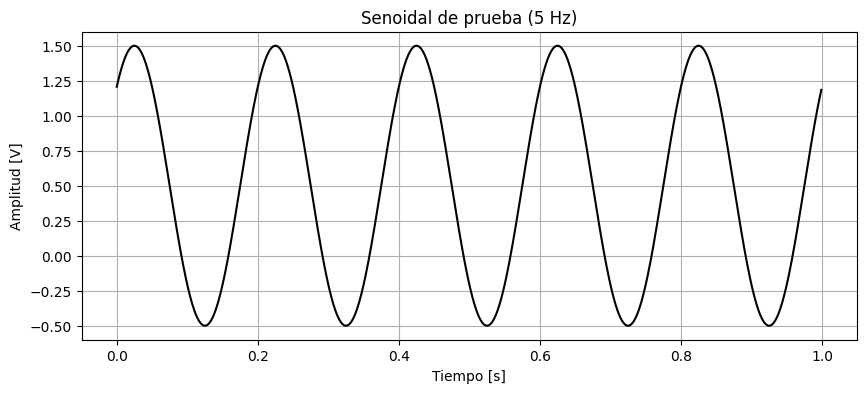

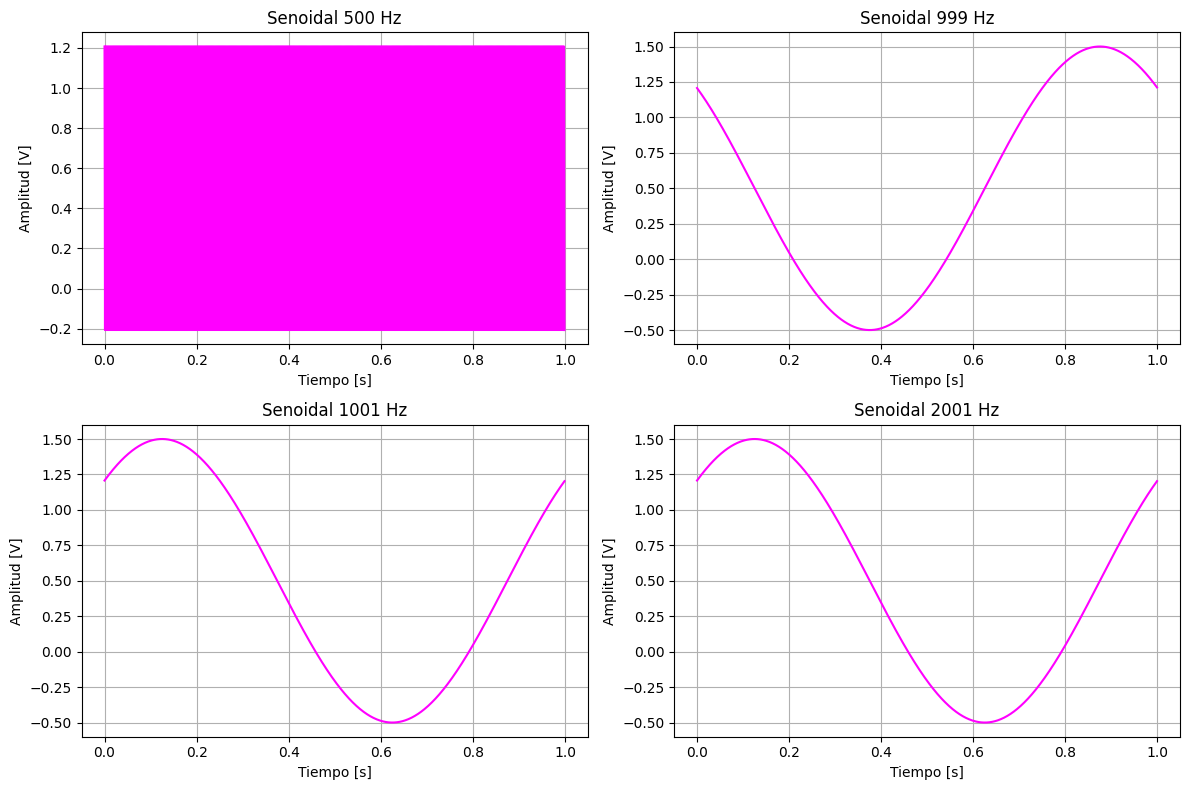

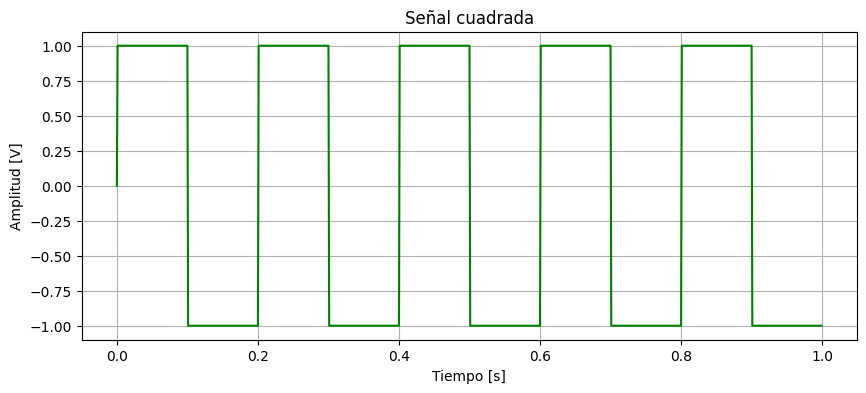

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def funcion_seno(amplitud=1, dc=0.5, frec=0, fase=np.pi/4, nmuestras=1000, fs=1000):
    """Con esta función genero una señal senoidal muestreada según los parámetros correspondientes:
    Amplitud máxima (amplitud), valor medio (dc), frecuencia en Hz (frec), fase en radianes, cantidad de muestras (nmuestras), y frecuencia de muestreo en Hz (fs).
    Esta función devuelve tt
    ts = 1/fs  # periodo de muestreo
    # tiempo de muestreo según cantidad de muestras tt: vector de tiempos [s] y xx: señal muestreada [V].
    """
    tt = (np.arange(nmuestras) / fs).reshape(-1, 1)      
    xx = (dc + amplitud * np.sin(2 * np.pi * frec * tt + fase)).reshape(-1, 1)  
    return tt, xx

# PARTE UNO: ejemplo simple de uso
tt, xx = funcion_seno(frec=5, nmuestras=1000, fs=1000)
#la grafico primero (sola)
plt.figure(figsize=(10,4))
plt.plot(tt, xx, color="black")
plt.title("Senoidal de prueba (5 Hz)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

# PARTE DOS: grafico de varias frecuencias (en un solo coso con un subplot)
frecuencias = [500, 999, 1001, 2001]  # Hz
plt.figure(figsize=(12, 8))  # Tamaño de la figura

for i, freq in enumerate(frecuencias):
    tt, xx = funcion_seno(frec=freq, nmuestras=1000, fs=1000)
    #le aumenté el numero de muestras a una cantidad un poco exhuberante pero me estaba quedando muy picuda, así queda bien suave
    plt.subplot(2, 2, i+1)  # subplot 2 filas, 2 columnas
    plt.plot(tt, xx, color="magenta")
    plt.title(f"Senoidal {freq} Hz")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid(True)
    

plt.tight_layout()
plt.show() 

# PARTE TRES: otra señal (elegí hacer una cuadrada porque la he usado en prácticas de laboratorio)

def funcion_cuadrada(amplitud=1, dc=0, frec=1, nmuestras=1000, fs=1000):
    tt = (np.arange(nmuestras) / fs).reshape(-1, 1)
    # sign(sin(blah)) devuelve +1 cuando el seno >=0 y -1 cuando es <0 
    # eso del sign me lo tiró chat porque yo no ubicaba esa función en python
    xx = (dc + amplitud * np.sign(np.sin(2 * np.pi * frec * tt))).reshape(-1, 1)
    return tt, xx

# Ejemplo señal cuadrada
tt, xx = funcion_cuadrada(amplitud=1, dc=0, frec=5, nmuestras=1000, fs=1000)

plt.figure(figsize=(10,4))
plt.plot(tt, xx, color="green") 
plt.title("Señal cuadrada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

## Análisis de resultados gráficos
Probé con una frecuencia de muestreo de 1000 Hz y un numero de muestras de 1000, como en clase.

La señal de 500Hz cae justo en la mitad del muestreo, es decir en el límite de lo que pide el teorema de Nyquist, y como solo toma dos muestras por ciclo (una en el pico máximo y la otra en el mínimo) la señal no se ve como una onda suave, sino que sube y baja tantas veces que se asemeja a un bloque compacto.

Por otro lado la señal de 999Hz es mucho mayor que lo que puede capturar correctamente mi muestreo, por lo que sucede aliasing, y en lugar de mostrarse como una oscilación rápida parece una onda de 1Hz, debido a que el sistema no puede seguir el ritmo de la señal real y la interpreta como si tuviera una frecuencia mucho menor.

EL mismo fenómeno ocurre para las frecuencias de 1001Hz y 2001Hz, el aliasing pliega la señal y muestra una oscilación de aproximadamente 1Hz. Esto prueba como señales muy distintas entre sí pueden parecer casi idénticas si la frecuencia de muestreo es insuciciente, además de que se visualizan incorrectamente. 

## Conclusiones y aprendizajes
El experimento permitió comprobar de manera práctica el teorema de Nyquist–Shannon: cuando la frecuencia de muestreo fue al menos el doble de la frecuencia máxima de la señal, los gráficos conservaron la forma senoidal esperada y pudieron interpretarse sin ambigüedades. En cambio, al no cumplirse esa condición, se observó aliasing: las señales muestreadas se “disfrazaban” con formas que no correspondían a la frecuencia real, lo cual confirma que es importante elegir frecuencias de muestreo correctas.

Este trabajo también me sirvió para empezar a familiarizarme con las herramientas de programación y visualización que vamos a usar a lo largo de la materia, que al principio me resultaban bastante nuevas. Si bien tuve que acudir a ChatGPT para alguna sintaxis en Python, y también en Jupyter (por ejemplo me explicó como formatear las fórmulas para que se lean bien), considero que entendí el trabajo correctamente, y mejoré en el uso de las herramientas.

PD.: Algo que no pude formatear correctamente fue lo de justificar el texto, lo que me sugiere chat solo funciona para segmentos cortos, si alguien me puede tirar una punta se aprecia! 
